In [1]:
import sopa
import spatialdata

/Users/ugursahin/miniforge3/envs/ScanPy/lib/python3.11/site-packages/dask/dataframe/__init__.py:31: FutureWarning: The legacy Dask DataFrame implementation is deprecated and will be removed in a future version. Set the configuration option `dataframe.query-planning` to `True` or None to enable the new Dask Dataframe implementation and silence this warning.
  warnings.warn(


In [2]:
sdata = spatialdata.read_zarr("/Volumes/DATA_2025/Projects/RAO/dbs/Xenium_and_AdjustedPhenoCycler.V6.zarr")
adata = sdata.tables["GeneTranscripts_XStock_PhenCyc_Props"]
#sdata.tables["GeneTranscripts_XStock_PhenCyc_Props_Rec"] = sdata.tables["GeneTranscripts_XStock_PhenCyc_Props"]

sdata

version mismatch: detected: RasterFormatV02, requested: FormatV04
/Users/ugursahin/miniforge3/envs/ScanPy/lib/python3.11/site-packages/zarr/creation.py:610: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)
/Users/ugursahin/miniforge3/envs/ScanPy/lib/python3.11/site-packages/zarr/creation.py:610: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)
/Users/ugursahin/miniforge3/envs/ScanPy/lib/python3.11/site-packages/zarr/creation.py:610: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)
/Users/ugursahin/miniforge3/envs/ScanPy/lib/python3.11/site-packages/zarr/creation.py:610: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)
/Users/ugursahin/miniforge3/envs/ScanPy/lib/python3.11/site-packages/z

SpatialData object, with associated Zarr store: /Volumes/DATA_2025/Projects/RAO/dbs/Xenium_and_AdjustedPhenoCycler.V6.zarr
├── Images
│     ├── 'HE': DataTree[cyx] (3, 6926, 21997), (3, 3464, 10999), (3, 1731, 5500), (3, 866, 2750), (3, 433, 1375), (3, 216, 687)
│     ├── 'PhenoCycler_Image': DataTree[cyx] (25, 6391, 20981), (25, 3195, 10490), (25, 1597, 5245), (25, 798, 2622), (25, 399, 1311)
│     └── 'Xenium_Image': DataTree[cyx] (5, 17141, 51168), (5, 8570, 25584), (5, 4285, 12792), (5, 2142, 6396), (5, 1071, 3198)
├── Labels
│     ├── 'cell_labels': DataTree[yx] (17141, 51168), (8570, 25584), (4285, 12792), (2142, 6396), (1071, 3198)
│     └── 'nucleus_labels': DataTree[yx] (17141, 51168), (8570, 25584), (4285, 12792), (2142, 6396), (1071, 3198)
├── Points
│     └── 'transcripts': DataFrame with shape: (<Delayed>, 13) (3D points)
├── Shapes
│     ├── 'cell_boundaries': GeoDataFrame shape: (113273, 1) (2D shapes)
│     ├── 'image_patches': GeoDataFrame shape: (176, 3) (2D shapes)
│

In [3]:
import spatialdata as sd
#from spatialdata_io import xenium

import matplotlib.pyplot as plt
import seaborn as sns

import scanpy as sc
#!pip install squidpy
import squidpy as sq

adata = sdata.tables["GeneTranscripts_XStock_PhenCyc_Props"]
adata.obs.columns

/Users/ugursahin/miniforge3/envs/ScanPy/lib/python3.11/site-packages/anndata/utils.py:434: FutureWarning: Importing read_text from `anndata` is deprecated. Import anndata.io.read_text instead.
  warnings.warn(msg, FutureWarning)


Index(['cell_id', 'transcript_counts', 'control_probe_counts',
       'genomic_control_counts', 'control_codeword_counts',
       'unassigned_codeword_counts', 'deprecated_codeword_counts',
       'total_counts', 'cell_area', 'nucleus_area', 'nucleus_count',
       'segmentation_method', 'region', 'z_level', 'cell_labels',
       'DAPI_PhenCyc', 'CD8_PhenCyc', 'CD31_PhenCyc', 'CD11c_PhenCyc',
       'CD34_PhenCyc', 'CD20_PhenCyc', 'CD4_PhenCyc', 'CD21_PhenCyc',
       'Ki67_PhenCyc', 'CD68_PhenCyc', 'E_cadherin_PhenCyc', 'pten_PhenCyc',
       'NF-H_PhenCyc', 'FOXp3_PhenCyc', 'CD45_PhenCyc', 'TFAM_PhenCyc',
       'PDL-1_PhenCyc', 'SOX2_PhenCyc', 'Vimentin_PhenCyc', 'HIF1A_PhenCyc',
       'CD44_PhenCyc', 'Keratin_8_18_PhenCyc', 'aSMA_PhenCyc', 'EpCAM_PhenCyc',
       'K14_PhenCyc', 'area', 'centroid-0', 'centroid-1', 'centroid_local-1',
       'centroid_weighted_local-0', 'centroid_weighted_local-1',
       'euler_number', 'extent', 'feret_diameter_max', 'intensity_max',
       'inten

## QC

In [4]:

sc.pp.calculate_qc_metrics(adata, percent_top=(10, 20, 50, 150), inplace=True)

cprobes = (
    adata.obs["control_probe_counts"].sum() / adata.obs["total_counts"].sum() * 100
)
cwords = (
    adata.obs["control_codeword_counts"].sum() / adata.obs["total_counts"].sum() * 100
)
print(f"Negative DNA probe count % : {cprobes}")
print(f"Negative decoding count % : {cwords}")

Negative DNA probe count % : 0.0009591530923264709
Negative decoding count % : 0.000270422017219798


<Axes: title={'center': 'Nucleus ratio'}, ylabel='Count'>

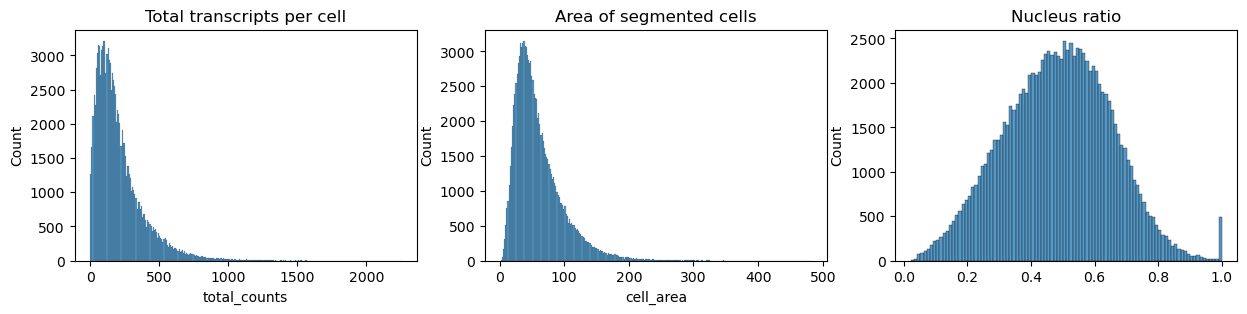

In [5]:
fig, axs = plt.subplots(1, 3, figsize=(15, 3))

axs[0].set_title("Total transcripts per cell")
sns.histplot(
    adata.obs["total_counts"],
    kde=False,
    ax=axs[0],
)

#axs[1].set_title("Unique transcripts per cell")
#sns.histplot(
#    adata.obs["n_genes_by_counts"],
#    kde=False,
#    ax=axs[1],
#)


axs[1].set_title("Area of segmented cells")
sns.histplot(
    adata.obs["cell_area"],
    kde=False,
    ax=axs[1],
)

axs[2].set_title("Nucleus ratio")
sns.histplot(
    adata.obs["nucleus_area"] / adata.obs["cell_area"],
    kde=False,
    ax=axs[2],
)

## PhenoCycler Biomarkers Enrichment will be paired w/ Proteins_PhenoCycler_byXStock

In [6]:

marker_cell_dict_cells_2 = {
'1': 'CD8', 
'2': 'CD31', 
'3': 'CD11c', 
'4': 'CD34', 
'5': 'CD20', 
'6': 'CD4', 
'7': 'CD21', 
'8': 'Ki67', 
'9': 'CD68', 
'10': 'E-cadherin', #Luminal Epithelial and Adenocarcinoma Cells
'11': 'pten', 
'12': 'NF-H', # Glandular 
'13': 'FOXp3', 
'14': 'CD45', 
'15': 'TFAM', 
'16': 'PDL-1', 
'17': 'SOX2', 
'18': 'Vimentin', 
'19': 'HIF1A', 
'20': 'CD44', 
'21': 'Keratin 8/18', #'Luminal epithelial cell (CK8/18⁺)',
'22': 'aSMA', #'Smooth muscle cell / myofibroblast', 
'24': 'K14'#'Basal epithelial cell (K14⁺)'
}

#Find the enriched cells by specific marker genes from PhenoCycler data
sopa.utils.higher_z_score(sdata.tables["Proteins_PhenoCycler_byXStock"], marker_cell_dict_cells_2)

[INFO] (sopa.utils.annotation) Annotation counts: cell_type
aSMA            12303
CD44            11773
Keratin 8/18    11275
E-cadherin       7904
CD34             6649
Ki67             6053
TFAM             5942
FOXp3            5066
Vimentin         4791
CD11c            4691
pten             4319
CD68             4168
CD21             3827
CD31             3641
K14              3508
CD8              3391
NF-H             3204
SOX2             2617
CD45             2073
PDL-1            2000
CD20             1583
CD4              1392
HIF1A            1103
Name: count, dtype: int64


## This is for the pairing cell_id with cell_type

In [7]:

sdata.tables["GeneTranscripts_XStock_PhenCyc_Props"].obs["cell_type"] = (
    sdata.tables["Proteins_PhenoCycler_byXStock"]
         .obs["cell_type"]
         .values
)

# now that obs has two columns: cell_id & cell_type
sdata.tables["GeneTranscripts_XStock_PhenCyc_Props"].obs["cell_type"]

0          CD4
1         CD68
2         CD68
3         CD45
4          CD8
          ... 
113268    pten
113269    aSMA
113270     CD4
113271     CD4
113272    SOX2
Name: cell_type, Length: 113273, dtype: object

#### PRE - FILTER OF DATA HIGHLY VARIABLE GENES


In [8]:
#!export OMP_MAX_ACTIVE_LEVELS=1   # replaces deprecated omp_set_nested
#!export OMP_NESTED=FALSE          # disable nested parallel regions
#!export KMP_DUPLICATE_LIB_OK=TRUE # allow multiple OpenMP runtimes


# 1. Normalize to counts per 10 000 spots per cell (CP10K)
sc.pp.normalize_total(adata, target_sum=1e4)

# 2. Log‐transform
sc.pp.log1p(adata)

# 3. Find highly variable genes (HVGs)
sc.pp.highly_variable_genes(
    adata,
    n_top_genes=2000,
    flavor="seurat"
)
#adata = adata[:, adata.var.highly_variable] ### NOT: DANININ KUYRUGU BURADA KOPUYOR
sc.pp.scale(adata, max_value=10) # Doesn't allow to dominate outlier genes

/Users/ugursahin/miniforge3/envs/ScanPy/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:243: UserWarning: Some cells have zero counts
  warn(UserWarning("Some cells have zero counts"))


#### MAIN ANALYSIS DOWNSTREAM OF PREPROCESSING ####


/Users/ugursahin/miniforge3/envs/ScanPy/lib/python3.11/site-packages/scanpy/preprocessing/_pca/__init__.py:536: UserWarning: Ignoring svd_solver='argpack' and using arpack, sklearn.decomposition._pca.PCA only supports dict_keys(['auto', 'full', 'randomized', 'arpack', 'covariance_eigh']).
  warnings.warn(msg)


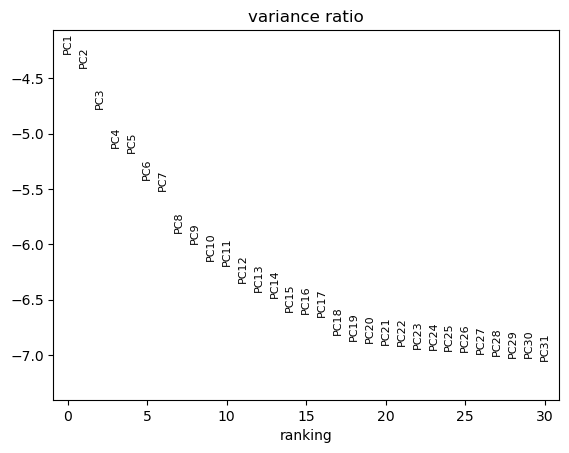

In [9]:
# 1. Dimensionality reduction & clustering
sc.tl.pca(adata, svd_solver = "argpack")
sc.pl.pca_variance_ratio(adata, log=True)

  Using cached leidenalg-0.10.2-cp38-abi3-macosx_11_0_arm64.whl.metadata (10 kB)
Using cached leidenalg-0.10.2-cp38-abi3-macosx_11_0_arm64.whl (1.4 MB)


/var/folders/4p/7h_929nx5qngrf9z7xhfy15w0000gn/T/ipykernel_61626/2870543140.py:5: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, resolution=1.0, key_added="leiden")


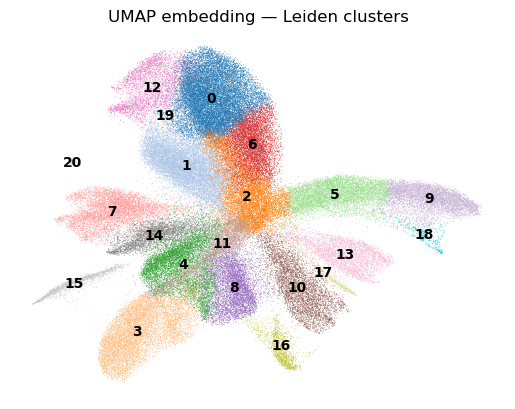

In [ ]:
# 2. LEIDEN + UMAP
sc.pp.neighbors(adata, n_neighbors=15, n_pcs=40) # includes elbow plot calculation
sc.tl.leiden(adata, resolution=1.0, key_added="leiden")
sc.tl.umap(adata)

sc.pl.umap(
    adata,
    color="leiden",
    palette="tab20",
    title="UMAP embedding — Leiden clusters",
    legend_loc="on data",
    frameon=False
)

## THE BIOMARKER ENRICHMENT ANALYSIS OBTAINED IN PREVIOUS SECTION IS MASKED ON UMAP

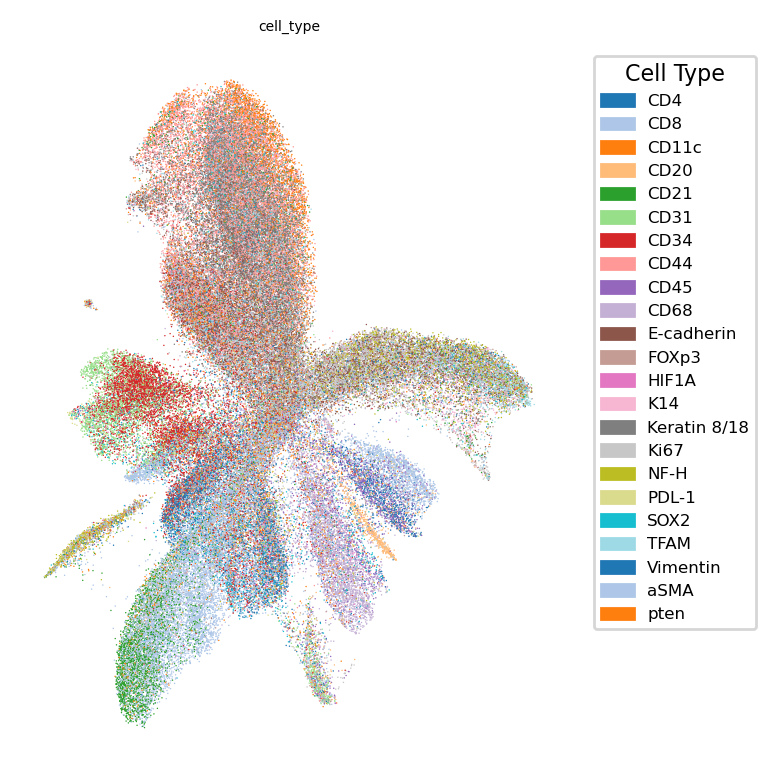

In [13]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

# after you’ve built cat_order:
cat_order = adata.obs['cell_type'].cat.categories.tolist()

# build a discrete list of colors (hex strings) matching that order
palette = sns.color_palette("tab20", n_colors=len(cat_order)).as_hex()
# 1) Ensure cell_type is categorical and grab its order
adata.obs['cell_type'] = adata.obs['cell_type'].astype('category')
cat_order = adata.obs['cell_type'].cat.categories.tolist()

# 2) Build a matching list of colors (same as you used for palette)
#    Here, we assume you already built “palette” as a list in cat_order
colors = palette  # list of colors in the same order as cat_order

# 3) Plot UMAP into a new Figure/Axes
fig, ax = plt.subplots(figsize=(4,4), dpi=200)
sc.pl.umap(
    adata,
    color='cell_type',
    palette=colors,
    ax=ax,
    show=False,
    frameon=False
)

# 4) Remove the default “on data” legend if present
if ax.get_legend() is not None:
    ax.get_legend().remove()

# 5) Create a manual legend
handles = [
    mpatches.Patch(color=colors[i], label=cat_order[i])
    for i in range(len(cat_order))
]
leg = ax.legend(
    handles=handles,
    title='Cell Type',
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    fontsize=6,
    title_fontsize=8
)

# 6) (Optional) shrink text on axes and title
ax.tick_params(labelsize=3)
ax.title.set_fontsize(5)

plt.tight_layout()
plt.show()

In [18]:
#### SPLITS THE CELLS IN AND OUT CLUSTER COM
# 5. Rank “Xenium spot counts” per Leiden group
sc.tl.rank_genes_groups(
    adata,
    groupby="leiden",
    method="wilcoxon",
    key_added="rank_leiden"
)

/Users/ugursahin/miniforge3/envs/ScanPy/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:484: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/Users/ugursahin/miniforge3/envs/ScanPy/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:484: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/Users/ugursahin/miniforge3/envs/ScanPy/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:484: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/Users/ugursahin/miniforge3/envs/ScanPy/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:484: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/Users/ugursahin/miniforge3/envs/ScanPy/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:484: RuntimeWarning: invalid value encounter

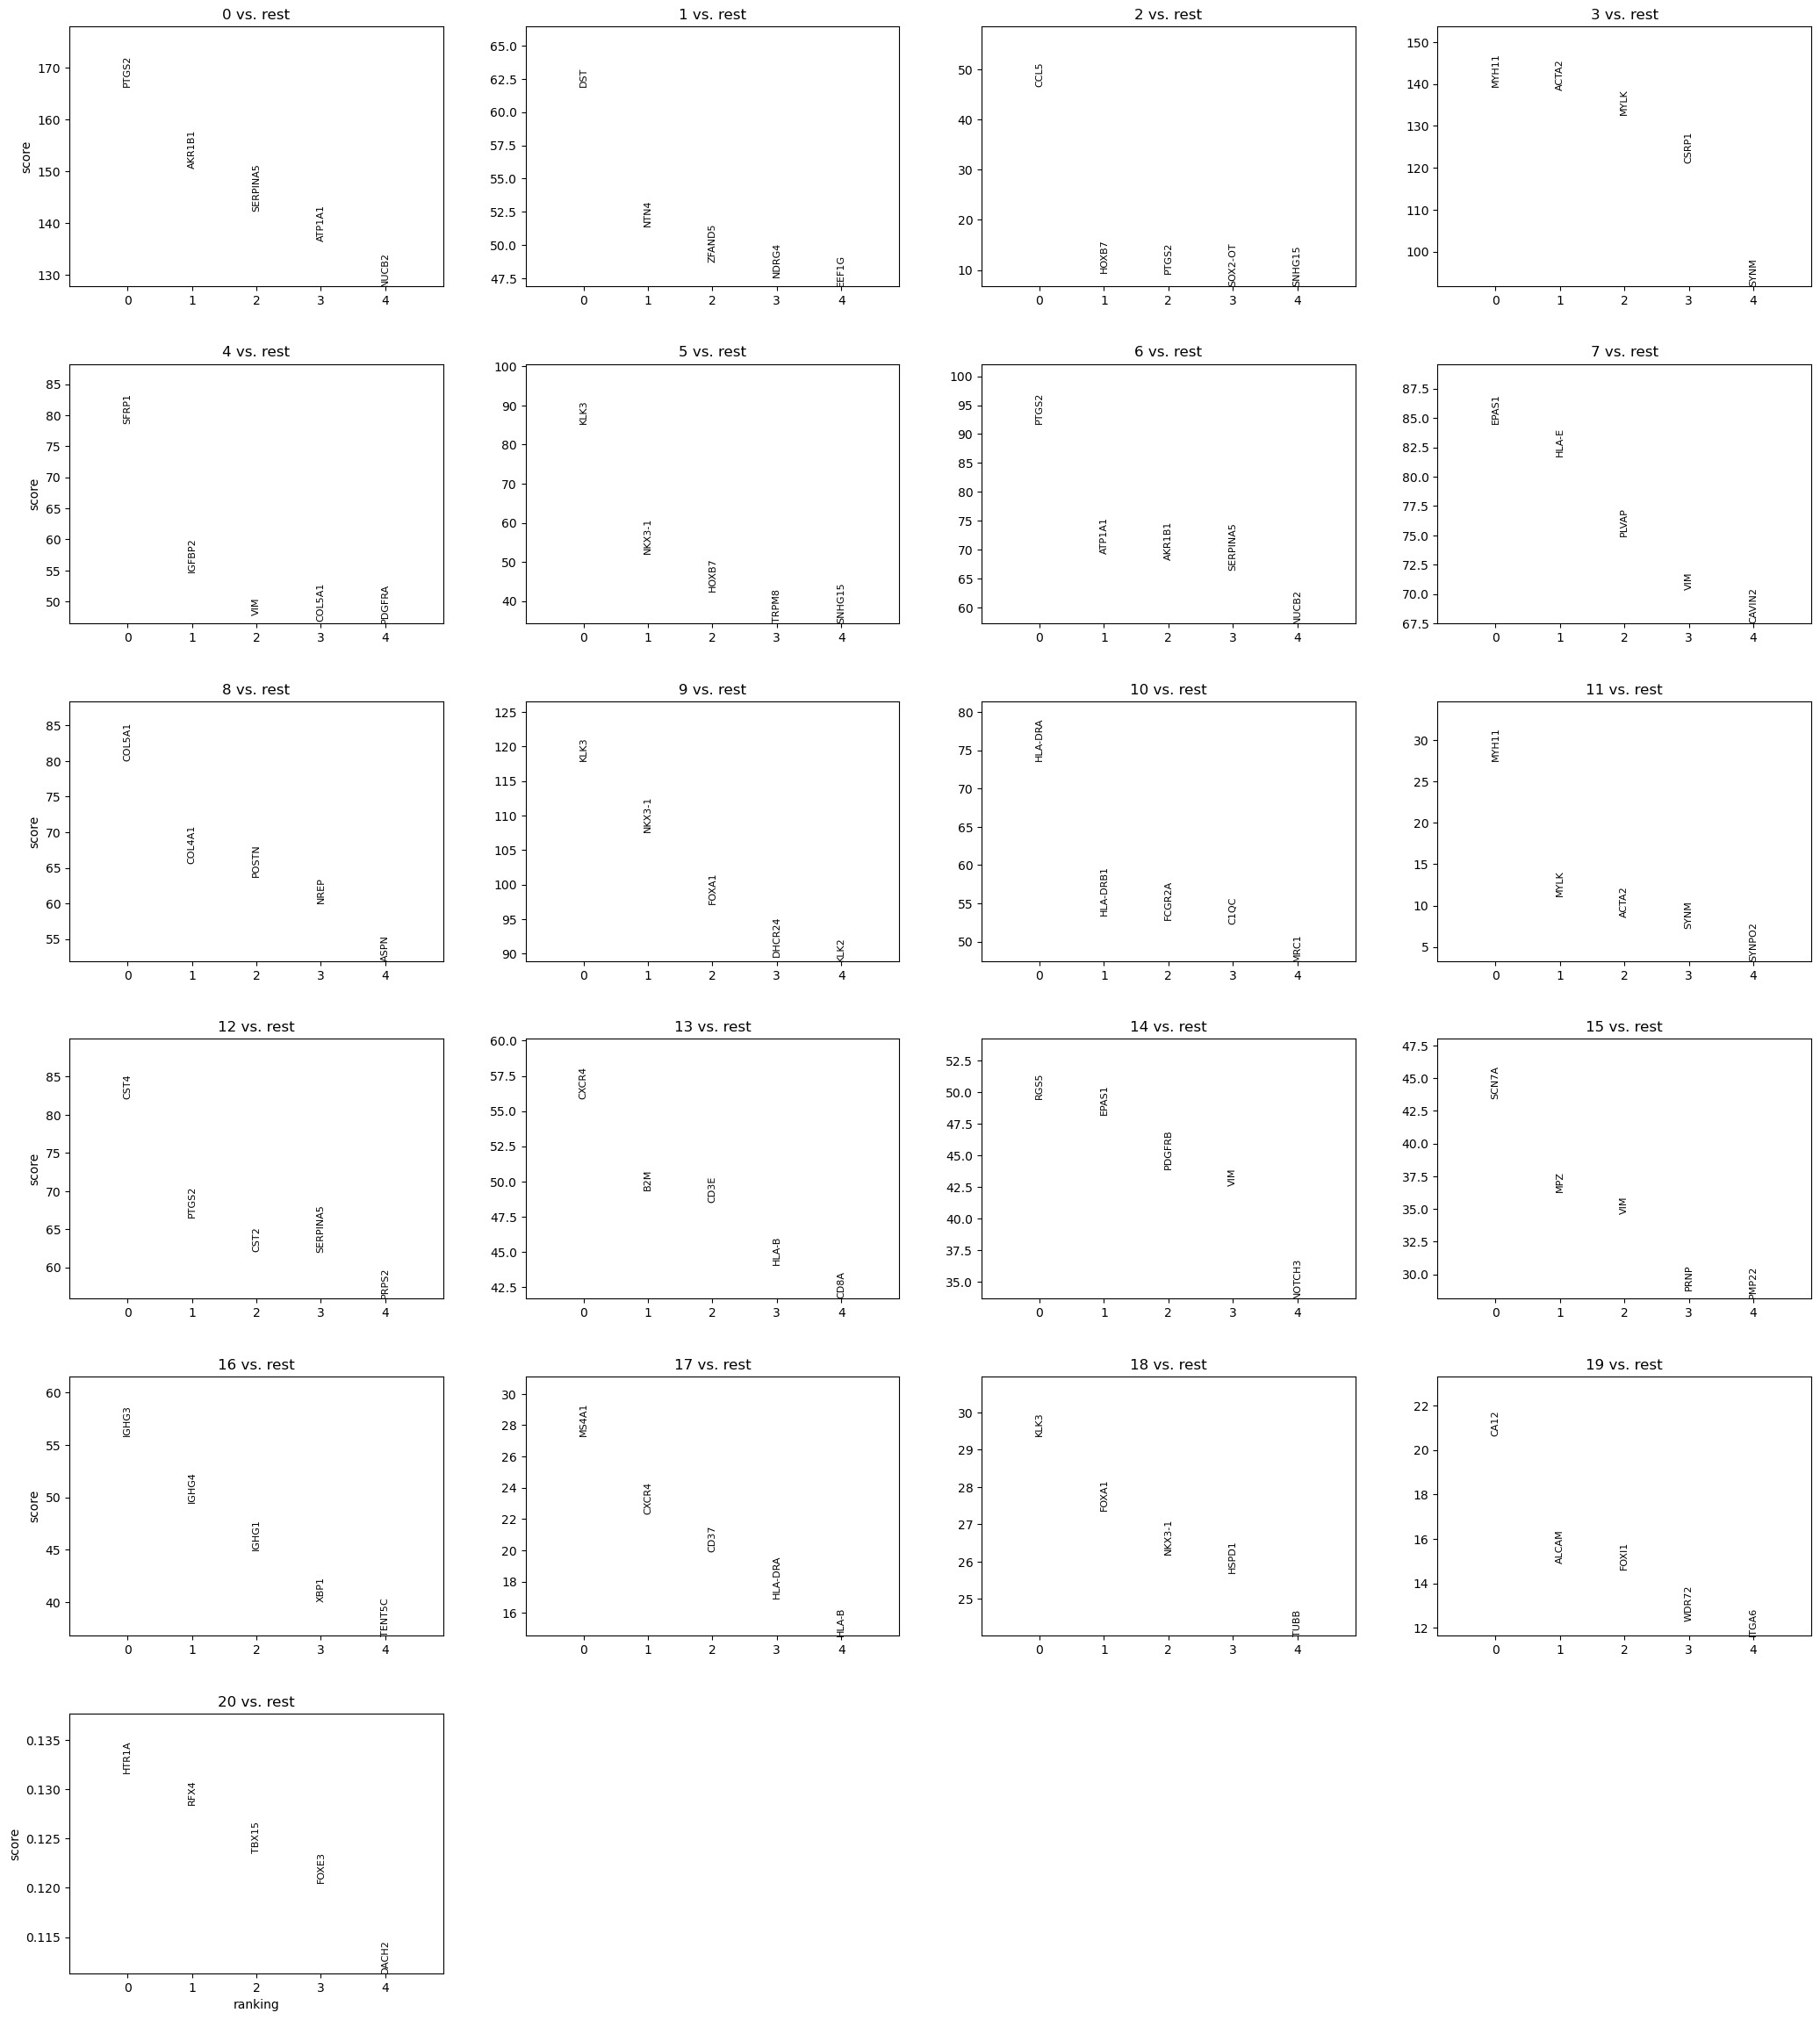

In [ ]:
sc.pl.rank_genes_groups(
    adata,
    key="rank_leiden",
    n_genes=5,
    sharey=False
)


In [22]:
import scanpy as sc
import pandas as pd
from collections import OrderedDict

# 1) Flatten all DE results into a DataFrame
df = sc.get.rank_genes_groups_df(
    adata,
    group=None,           # None = include every Leiden cluster
    key="rank_leiden"     # the key you used when running rank_genes_groups
)                     

# 2) For each cluster, take the first 7 genes
top7 = (
    df
      .groupby("group")["names"]
      .apply(lambda genes: genes.iloc[:7].tolist())
)

# 3) Convert to a nice table
df_top7 = pd.DataFrame({
    f"cluster_{grp}": genes 
    for grp, genes in top7.items()
})

# 4) (Optional) preserve column order
df_top7 = df_top7[sorted(df_top7.columns, key=lambda x: int(x.split("_")[1]))]

df_top7

/var/folders/4p/7h_929nx5qngrf9z7xhfy15w0000gn/T/ipykernel_61626/4249037683.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("group")["names"]


,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8,cluster_9,...,cluster_11,cluster_12,cluster_13,cluster_14,cluster_15,cluster_16,cluster_17,cluster_18,cluster_19,cluster_20
0,PTGS2,DST,CCL5,MYH11,SFRP1,KLK3,PTGS2,EPAS1,COL5A1,KLK3,...,MYH11,CST4,CXCR4,RGS5,SCN7A,IGHG3,MS4A1,KLK3,CA12,HTR1A
1,AKR1B1,NTN4,HOXB7,ACTA2,IGFBP2,NKX3-1,ATP1A1,HLA-E,COL4A1,NKX3-1,...,MYLK,PTGS2,B2M,EPAS1,MPZ,IGHG4,CXCR4,FOXA1,ALCAM,RFX4
2,SERPINA5,ZFAND5,PTGS2,MYLK,VIM,HOXB7,AKR1B1,PLVAP,POSTN,FOXA1,...,ACTA2,CST2,CD3E,PDGFRB,VIM,IGHG1,CD37,NKX3-1,FOXI1,TBX15
3,ATP1A1,NDRG4,SOX2-OT,CSRP1,COL5A1,TRPM8,SERPINA5,VIM,NREP,DHCR24,...,SYNM,SERPINA5,HLA-B,VIM,PRNP,XBP1,HLA-DRA,HSPD1,WDR72,FOXE3
4,NUCB2,EEF1G,SNHG15,SYNM,PDGFRA,SNHG15,NUCB2,CAVIN2,ASPN,KLK2,...,SYNPO2,PRPS2,CD8A,NOTCH3,PMP22,TENT5C,HLA-B,TUBB,ITGA6,DACH2
5,FDX1,H3F3B,SOST,TES,IGF1,PPP3CA,APP,PECAM1,PDGFRB,NDRG1,...,CSRP1,ATP1A1,IL7R,ADAMTS1,CLIC4,MZB1,CD79A,DHCR24,GADD45A,TGM1
6,FADS2,ERRFI1,PGA3,SMTN,SFRP2,JAG1,FADS2,HLA-B,EPHA3,TRPM8,...,SMTN,AKR1B1,HLA-E,MYH11,L1CAM,B2M,TNFRSF13C,HOXB13,EPDR1,CYP2A6


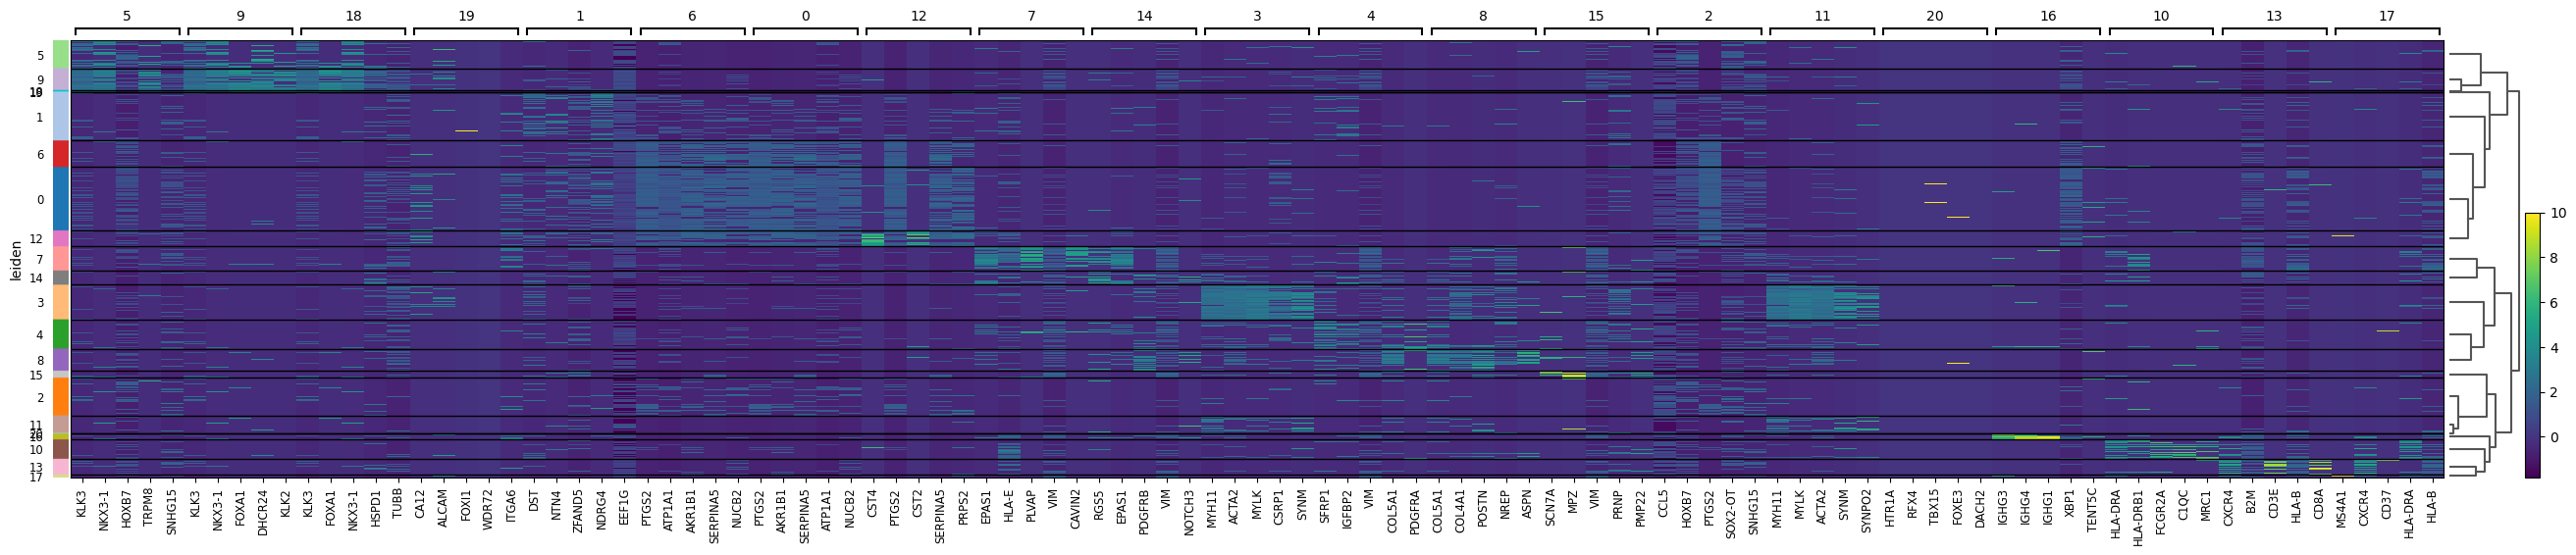

In [19]:
# 6. Visualize top markers
sc.pl.rank_genes_groups_heatmap(
    adata,
    key="rank_leiden",
    groupby="leiden",
    n_genes=5,
    swap_axes=False,
    show_gene_labels=True,
    dendrogram=True
)

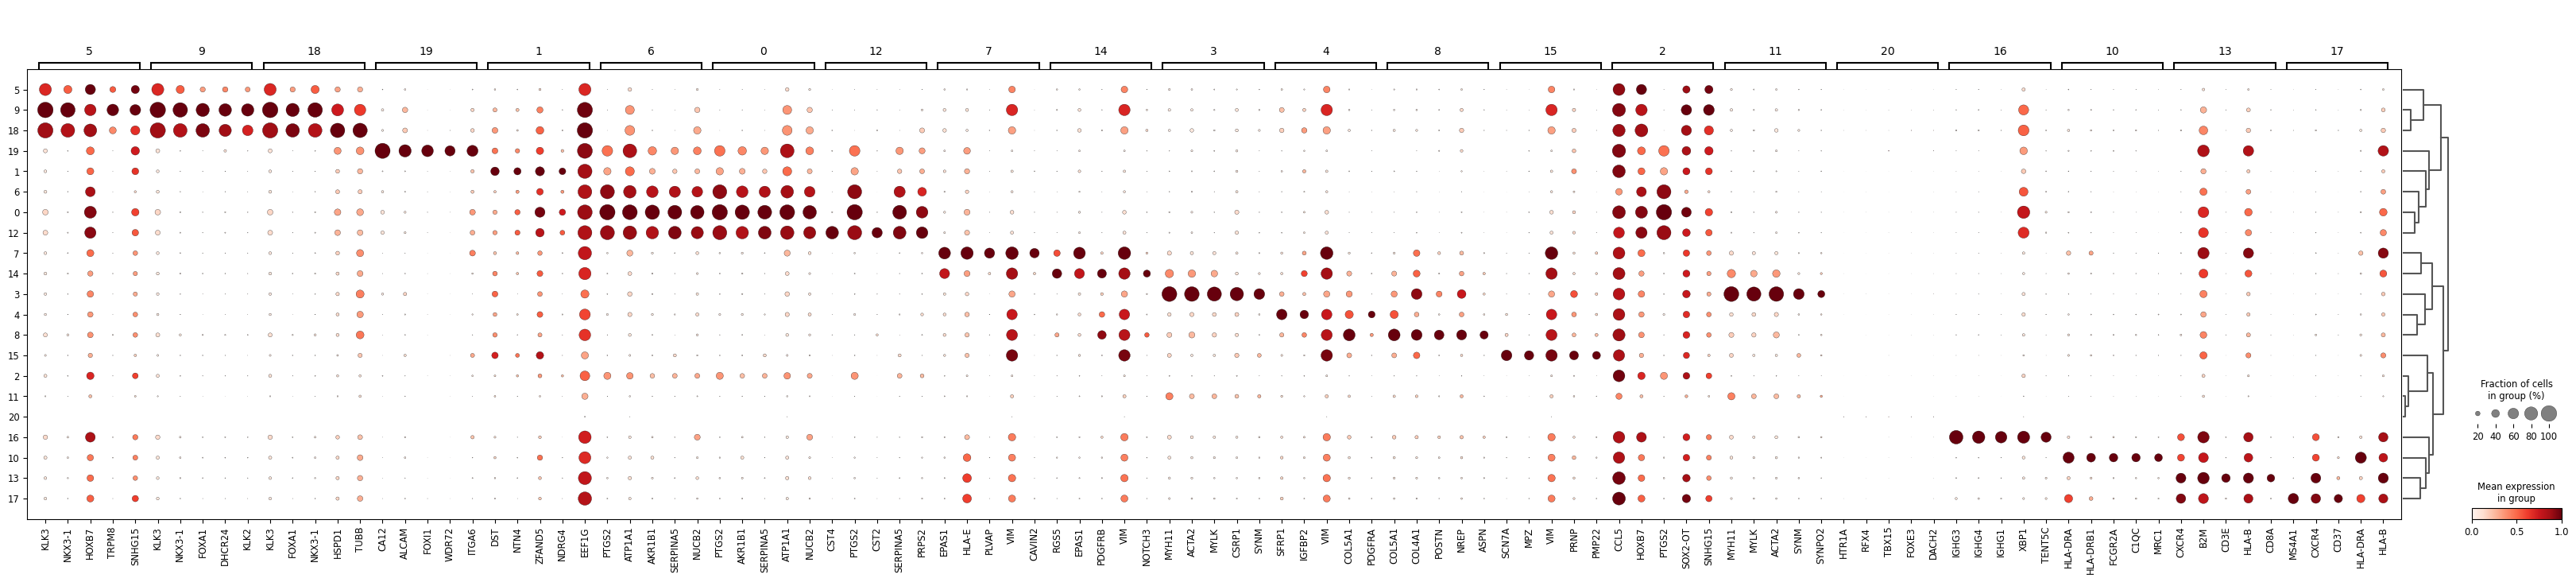

In [20]:
sc.pl.rank_genes_groups_dotplot(
    adata,
    key="rank_leiden",
    groupby="leiden",
    n_genes=5,
    standard_scale="var"
)

In [28]:
# !pip install plotly
# import pandas as pd
# import plotly.express as px

# # 1) Assemble your DataFrame
# df = pd.DataFrame({
#     "x": adata.obsm["spatial"][:, 0],
#     "y": adata.obsm["spatial"][:, 1],
#     "cell_type": adata.obs["cell_type_manuel"].astype(str).values,
# })

# # 2) Create the Plotly scatter with large dimensions
# fig = px.scatter(
#     df,
#     x="x",
#     y="y",
#     color="cell_type",
#     category_orders={"cell_type": list(annotation_dict.values())},
#     color_discrete_sequence=px.colors.qualitative.T10,
#     width=3000,   # 22 inches × 100 dpi
#     height=1200,  # 44 inches × 100 dpi
# )

# # 3) Tweak marker size, opacity, hide axes
# fig.update_traces(marker=dict(size=4, opacity=0.6), selector=dict(mode="markers"))
# fig.update_layout(
#     legend_title_text="Cell Type",
#     title="Spatial scatter — cell_type_manuel",
#     xaxis=dict(showgrid=False, zeroline=False, visible=False),
#     yaxis=dict(showgrid=False, zeroline=False, visible=False),
#     margin=dict(l=10, r=10, t=30, b=10),
# )
# fig.update_traces(marker=dict(size=5))

# fig.write_html("leiden_onTissue_Region1.html")

In [16]:
#sdata.tables["GeneTranscripts_XStock_PhenCyc_Props_Ann"] = adata
#adata.write("/Volumes/DATA_2025/Projects/RAO/dbs/Xenium_Region1_DownstreamAnalysis.image_props.phenocycler.annotated_UMAP.zarr")
sdata.write("/Volumes/DATA_2025/Projects/RAO/dbs/Xenium_and_AdjustedPhenoCycler.V7.zarr")

INFO     The SpatialData object is not self-contained (i.e. it contains some elements that are Dask-backed from    
         locations outside /Volumes/DATA_2025/Projects/RAO/dbs/Xenium_and_AdjustedPhenoCycler.V7.zarr). Please see 
         the documentation of `is_self_contained()` to understand the implications of working with SpatialData     
         objects that are not self-contained.                                                                      
INFO     The Zarr backing store has been changed from                                                              
         /Volumes/DATA_2025/Projects/RAO/dbs/Xenium_and_AdjustedPhenoCycler.V6.zarr the new file path:             
         /Volumes/DATA_2025/Projects/RAO/dbs/Xenium_and_AdjustedPhenoCycler.V7.zarr                                


In [27]:
adata

AnnData object with n_obs × n_vars = 113273 × 5101
    obs: 'cell_id', 'transcript_counts', 'control_probe_counts', 'genomic_control_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'deprecated_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'nucleus_count', 'segmentation_method', 'region', 'z_level', 'cell_labels', 'DAPI_PhenCyc', 'CD8_PhenCyc', 'CD31_PhenCyc', 'CD11c_PhenCyc', 'CD34_PhenCyc', 'CD20_PhenCyc', 'CD4_PhenCyc', 'CD21_PhenCyc', 'Ki67_PhenCyc', 'CD68_PhenCyc', 'E_cadherin_PhenCyc', 'pten_PhenCyc', 'NF-H_PhenCyc', 'FOXp3_PhenCyc', 'CD45_PhenCyc', 'TFAM_PhenCyc', 'PDL-1_PhenCyc', 'SOX2_PhenCyc', 'Vimentin_PhenCyc', 'HIF1A_PhenCyc', 'CD44_PhenCyc', 'Keratin_8_18_PhenCyc', 'aSMA_PhenCyc', 'EpCAM_PhenCyc', 'K14_PhenCyc', 'area', 'centroid-0', 'centroid-1', 'centroid_local-1', 'centroid_weighted_local-0', 'centroid_weighted_local-1', 'euler_number', 'extent', 'feret_diameter_max', 'intensity_max', 'intensity_min', 'intensity_mean', 'solidity', 'ecc